In [2]:
# Import all libraries used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [3]:
# Read the CSV file into a DataFrame
file_path = 'C:\\Users\\thiba\\Downloads\\DataForClass.csv'
data = pd.read_csv(file_path, sep=';')

# Iterate over each column in the DataFrame
for column in data.columns:
    # Convert the column to string type
    data[column] = data[column].astype(str)
    # Store the original column name
    original_column_name = column
    # Split the values in the column based on the semicolon delimiter
    new_columns = data[column].str.split(';', expand=True)
    # Convert the values to numeric (integers or floats) if possible
    new_columns = new_columns.apply(pd.to_numeric, errors='ignore')
    # Rename the new columns with the original column name + suffix
    new_columns.columns = [f"{original_column_name}_{i}" for i in range(len(new_columns.columns))]
    # Concatenate the new columns with the original DataFrame
    data = pd.concat([data, new_columns], axis=1)
    # Drop the original column
    data.drop(column, axis=1, inplace=True)

# Print the DataFrame with the split columns
print(data)



      id_0    codes_0  age_0  gender_0     dates_0  bad_0 last_0 SAPS_0  \
0     8309   20017421     60         1  10/10/2019      0     in    nan   
1     8309   20017421     60         1  11/10/2019      0     in   85.0   
2     8309   20017421     60         1  12/10/2019      0     in   66.0   
3     8309   20017421     60         1  13/10/2019      1   last   57.0   
4     6112   40026409     60         1  28/04/2018      0     in    nan   
...    ...        ...    ...       ...         ...    ...    ...    ...   
6223  8489   90029738     80         1  21/11/2019      1   last   31.0   
6224  7216  504137604     68         1  15/02/2019      0     in    nan   
6225  7216  504137604     68         1  16/02/2019      1     in    nan   
6226  7216  504137604     68         1  17/02/2019      1   last    nan   
6227  7222  504138853     85         1  16/02/2019      0   last    nan   

     Glasgow_0 TISS_0   PA_0   FC_0 Temp_0  dayIn_0  
0          6.0    nan   73.0  130.0   37.3   

In [4]:
#Description of the data
data.describe()

,id_0,codes_0,age_0,gender_0,bad_0,dayIn_0
count,6228.000000,6.228000e+03,6228.000000,6228.000000,6228.000000,6228.000000
mean,7014.734746,5.091105e+07,62.348908,0.671805,0.142421,7.583815
std,875.158646,1.161947e+07,16.378840,0.469594,0.349510,7.827997
min,5583.000000,2.001742e+07,14.000000,0.000000,0.000000,1.000000
25%,6252.000000,5.050512e+07,53.000000,0.000000,0.000000,2.000000
50%,6974.000000,5.072733e+07,65.000000,1.000000,0.000000,5.000000
75%,7755.000000,5.074453e+07,75.000000,1.000000,0.000000,10.000000
max,8680.000000,5.041389e+08,96.000000,1.000000,1.000000,64.000000


In [5]:
#Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_0       6228 non-null   int64 
 1   codes_0    6228 non-null   int64 
 2   age_0      6228 non-null   int64 
 3   gender_0   6228 non-null   int64 
 4   dates_0    6228 non-null   object
 5   bad_0      6228 non-null   int64 
 6   last_0     6228 non-null   object
 7   SAPS_0     6228 non-null   object
 8   Glasgow_0  6228 non-null   object
 9   TISS_0     6228 non-null   object
 10  PA_0       6228 non-null   object
 11  FC_0       6228 non-null   object
 12  Temp_0     6228 non-null   object
 13  dayIn_0    6228 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 681.3+ KB


In [6]:
#Columns name of the data
data.columns

Index(['id_0', 'codes_0', 'age_0', 'gender_0', 'dates_0', 'bad_0', 'last_0',
       'SAPS_0', 'Glasgow_0', 'TISS_0', 'PA_0', 'FC_0', 'Temp_0', 'dayIn_0'],
      dtype='object')

In [7]:
#drop useless columns
data.drop(columns=['id_0', 'codes_0','dates_0','last_0'], inplace=True)

#transform object in float 
data = data.astype(float)

In [8]:
# replace NA values with the median
# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit and transform your data  with the imputer
data = imputer.fit_transform(data)

In [9]:
data = pd.DataFrame(data)

In [10]:
# Rename columns
data.rename(columns={0: 'age', 1: 'gender', 2: 'bad', 3: 'SAPS', 4: 'Glasgow', 5: 'TISS', 6: 'PA', 7: 'FC', 8: 'Temp', 9: 'dayln'}, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      6228 non-null   float64
 1   gender   6228 non-null   float64
 2   bad      6228 non-null   float64
 3   SAPS     6228 non-null   float64
 4   Glasgow  6228 non-null   float64
 5   TISS     6228 non-null   float64
 6   PA       6228 non-null   float64
 7   FC       6228 non-null   float64
 8   Temp     6228 non-null   float64
 9   dayln    6228 non-null   float64
dtypes: float64(10)
memory usage: 486.7 KB


In [12]:
# display the correlation matrix between numeric variables
corr = data.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,age,gender,bad,SAPS,Glasgow,TISS,PA,FC,Temp,dayln
age,1.000000,-0.091844,-0.070146,0.373737,0.033508,0.070065,-0.122359,-0.103692,-0.096902,0.023328
gender,-0.091844,1.000000,0.021633,-0.038244,0.019527,0.006591,-0.045611,0.026458,0.041035,-0.029518
bad,-0.070146,0.021633,1.000000,-0.268245,0.309901,-0.305145,0.078556,-0.035167,0.048055,0.044501
SAPS,0.373737,-0.038244,-0.268245,1.000000,-0.485838,0.336076,-0.126528,0.066191,-0.108176,-0.209490
Glasgow,0.033508,0.019527,0.309901,-0.485838,1.000000,-0.328613,0.027151,-0.013609,0.071318,0.235102
TISS,0.070065,0.006591,-0.305145,0.336076,-0.328613,1.000000,-0.092299,0.088961,-0.111314,-0.122345
PA,-0.122359,-0.045611,0.078556,-0.126528,0.027151,-0.092299,1.000000,0.044150,0.018472,0.014368
FC,-0.103692,0.026458,-0.035167,0.066191,-0.013609,0.088961,0.044150,1.000000,0.156480,-0.002242
Temp,-0.096902,0.041035,0.048055,-0.108176,0.071318,-0.111314,0.018472,0.156480,1.000000,0.048480
dayln,0.023328,-0.029518,0.044501,-0.209490,0.235102,-0.122345,0.014368,-0.002242,0.048480,1.000000


No strong correlation so we don't remove features

In [13]:
#Remove extreme outliers
Q1 = data.quantile(0.05, numeric_only=True)
Q3 = data.quantile(0.95, numeric_only=True)
IQR = Q3 - Q1

# Define a function to remove outliers based on IQR
def remove_outliers(col):
    global data
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


# Remove outliers from each numerical column
for col in ['gender','age', 'dayln','TISS','Glasgow','SAPS','PA','FC','Temp']:
    remove_outliers(col)


In [14]:
# Select relevant features
features = ['gender','age', 'dayln','TISS','Glasgow','SAPS','PA','FC','Temp']
# Prepare the data with selected features and the target variable 'bad'
X = data[features]
y = data['bad']

In [15]:
# Create an instance of SMOTE
smote = SMOTE()
# Fit and transform your data with SMOTEENN
X, y = smote.fit_resample(X, y)

In [16]:
# Split the dataset into testing and training part
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.7,
    shuffle = True,
)

In [17]:
param_dict_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'lr__penalty': ['l1', 'l2'],  # Type of regularization used
    'lr__solver': ['liblinear', 'saga'],  # Solvers that support both l1 and l2
    'select__k': ['all']  # Parameter for SelectKBest
}

clf_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('lr', LogisticRegression())
])

In [18]:
grid_clf_lr = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_dict_lr,
    scoring='f1_weighted',
    refit=True,
    cv=3,
    verbose=10,
    error_score='raise'
)

grid_clf_lr.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=all
[CV 1/3; 1/20] END lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=all;, score=0.746 total time=   0.0s
[CV 2/3; 1/20] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=all
[CV 2/3; 1/20] END lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=all;, score=0.751 total time=   0.0s
[CV 3/3; 1/20] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=all
[CV 3/3; 1/20] END lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=all;, score=0.753 total time=   0.0s
[CV 1/3; 2/20] START lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=all
[CV 1/3; 2/20] END lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=all;, score=0.744 total time=   0.0s
[CV 2/3; 2/20] START lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=all
[CV 2/3; 2/20] END lr__C=0.001, lr__penalty=l1, lr__solv

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x000002636C3C3100>)),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'saga'],
                         'select__k': ['all']},
             scoring='f1_weighted', verbose=10)

In [19]:
# Predict categories for testing dataset LR
y_pred_lr = grid_clf_lr.predict(X_test)
y_pred_proba_lr = grid_clf_lr.predict_proba(X_test)

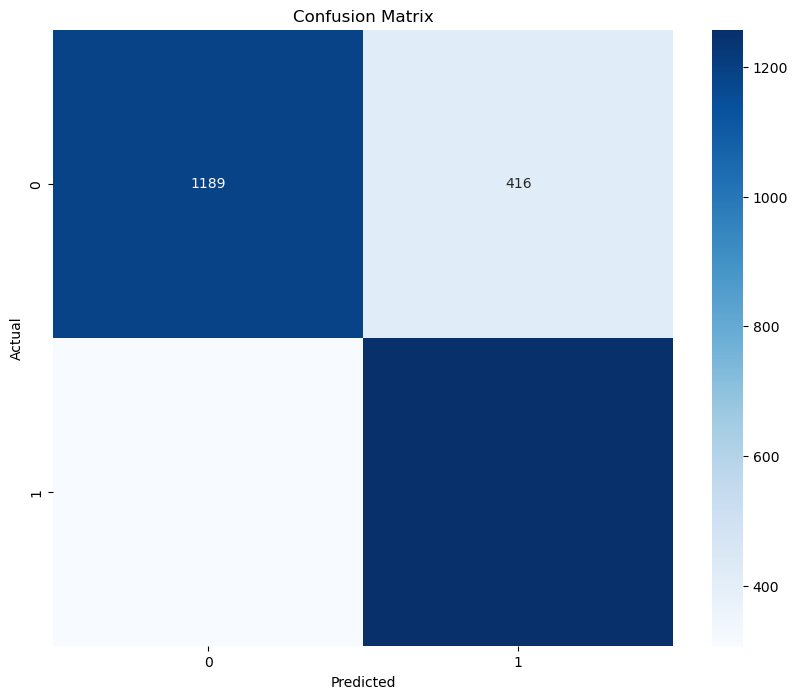

array([[1189,  416],
       [ 308, 1257]], dtype=int64)

In [20]:
# Compute and visualize the confusion matrix LR
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm_lr

In [21]:
print("Classification report Multi-Class Logistic Regression : ")
print(classification_report(y_test, y_pred_lr))

Classification report Multi-Class Logistic Regression : 
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77      1605
         1.0       0.75      0.80      0.78      1565

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170



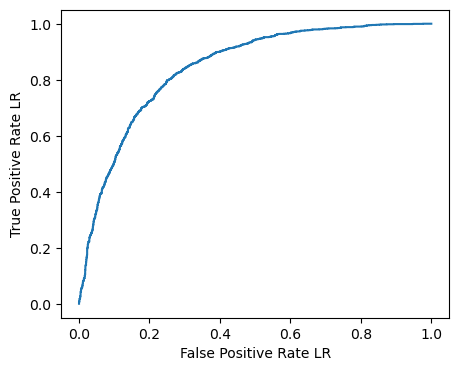

In [22]:
# Compute ROC curve LR
fpr_lr, tpr_lr, thresholds_lr = roc_curve(
    y_test, # the true class
    y_pred_proba_lr[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve LR
plt.figure(figsize = [5, 4])
plt.plot(fpr_lr, tpr_lr, '-')
plt.xlabel('False Positive Rate LR')
plt.ylabel('True Positive Rate LR')
plt.show()


In [23]:
param_dict_knn = {
    'knn__n_neighbors': range(3,32,2),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'select__k': ['all']  # Parameter for SelectKBest
}

# construct the pipeline
clf_knn = Pipeline([
    ('standard scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('knn', KNeighborsClassifier())
])


In [24]:
# Perform grid search with cross-validation KNN
max_iter=999
grid_clf_knn = RandomizedSearchCV(
    estimator=clf_knn,
    param_distributions=param_dict_knn,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_knn.fit(X_train, y_train)

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 90 is smaller than n_iter=999. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3; 1/90] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=all
[CV 1/3; 1/90] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=all;, score=0.850 total time=   0.0s
[CV 2/3; 1/90] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=all
[CV 2/3; 1/90] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=all;, score=0.852 total time=   0.1s
[CV 3/3; 1/90] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=all
[CV 3/3; 1/90] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=all;, score=0.869 total time=   0.1s
[CV 1/3; 2/90] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=all
[CV 1/3; 2/90] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=all;, score=0.859 total time=   0.0s
[CV 2/3; 2/9

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standard scaler',
                                              StandardScaler()),
                                             ('select',
                                              SelectKBest(score_func=<function f_regression at 0x000002636C3C3100>)),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=999,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'minkowski'],
                                        'knn__n_neighbors': range(3, 32, 2),
                                        'knn__weights': ['uniform', 'distance'],
                                        'select__k': ['all']},
                   scoring='f1_weighted', verbose=10)

In [25]:
# Check the best estimator and the best score
print("Result KNN: ")
print('Best hyper-parameters KNN:', grid_clf_knn.best_params_)
print('Best score KNN:', grid_clf_knn.best_score_)

Result KNN: 
Best hyper-parameters KNN: {'select__k': 'all', 'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'manhattan'}
Best score KNN: 0.8850225407939529


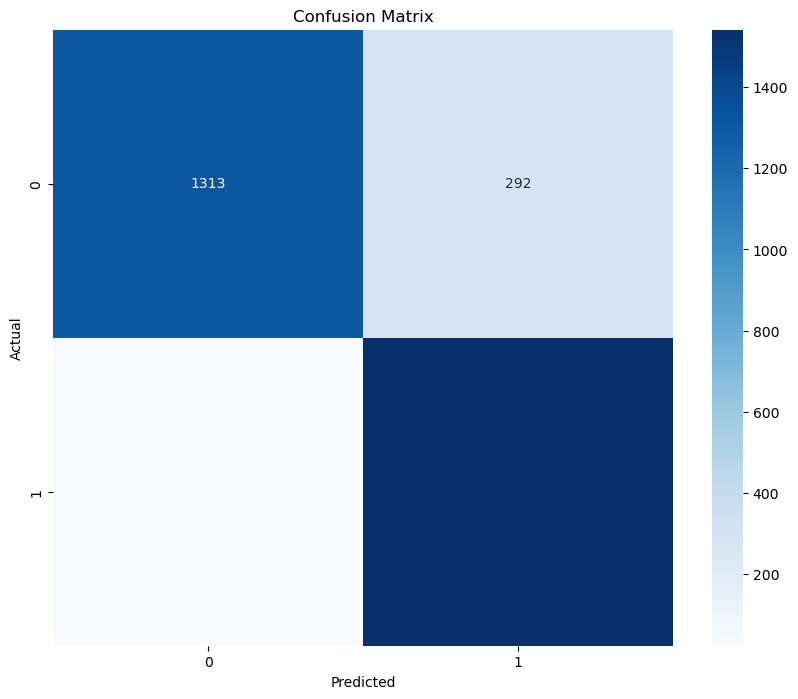

array([[1313,  292],
       [  24, 1541]], dtype=int64)

In [26]:
# Predict categories for testing dataset KNN
y_pred_knn = grid_clf_knn.predict(X_test)
y_pred_proba_knn = grid_clf_knn.predict_proba(X_test)

# compute and visualize the confusion matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm_knn

In [27]:
# get all metrics using `classification_report`
print("Classification report KNN : ")
print(classification_report(y_test, y_pred_knn))

Classification report KNN : 
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      1605
         1.0       0.84      0.98      0.91      1565

    accuracy                           0.90      3170
   macro avg       0.91      0.90      0.90      3170
weighted avg       0.91      0.90      0.90      3170



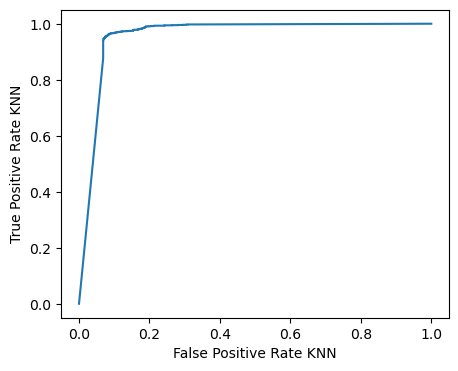

In [28]:
# Compute ROC curve KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(
    y_test, # the true class
    y_pred_proba_knn[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve KNN
plt.figure(figsize = [5, 4])
plt.plot(fpr_knn, tpr_knn, '-')
plt.xlabel('False Positive Rate KNN')
plt.ylabel('True Positive Rate KNN')
plt.show()

In [29]:
param_dict_svc = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'select__k': ['all'] ,  # Parameter for SelectKBest
}

clf_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('svc', SVC())
])


In [30]:
grid_clf_svc = GridSearchCV(
    estimator=clf_svc,
    param_grid=param_dict_svc,
    scoring='f1_weighted',
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_svc.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START select__k=all, svc__C=0.001, svc__kernel=linear............
[CV 1/3; 1/20] END select__k=all, svc__C=0.001, svc__kernel=linear;, score=0.752 total time=   0.7s
[CV 2/3; 1/20] START select__k=all, svc__C=0.001, svc__kernel=linear............
[CV 2/3; 1/20] END select__k=all, svc__C=0.001, svc__kernel=linear;, score=0.752 total time=   0.6s
[CV 3/3; 1/20] START select__k=all, svc__C=0.001, svc__kernel=linear............
[CV 3/3; 1/20] END select__k=all, svc__C=0.001, svc__kernel=linear;, score=0.763 total time=   0.6s
[CV 1/3; 2/20] START select__k=all, svc__C=0.001, svc__kernel=rbf...............
[CV 1/3; 2/20] END select__k=all, svc__C=0.001, svc__kernel=rbf;, score=0.336 total time=   1.6s
[CV 2/3; 2/20] START select__k=all, svc__C=0.001, svc__kernel=rbf...............
[CV 2/3; 2/20] END select__k=all, svc__C=0.001, svc__kernel=rbf;, score=0.336 total time=   1.6s
[CV 3/3; 2/20] START select__k=all, svc_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x000002636C3C3100>)),
                                       ('svc', SVC())]),
             param_grid={'select__k': ['all'],
                         'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=10)

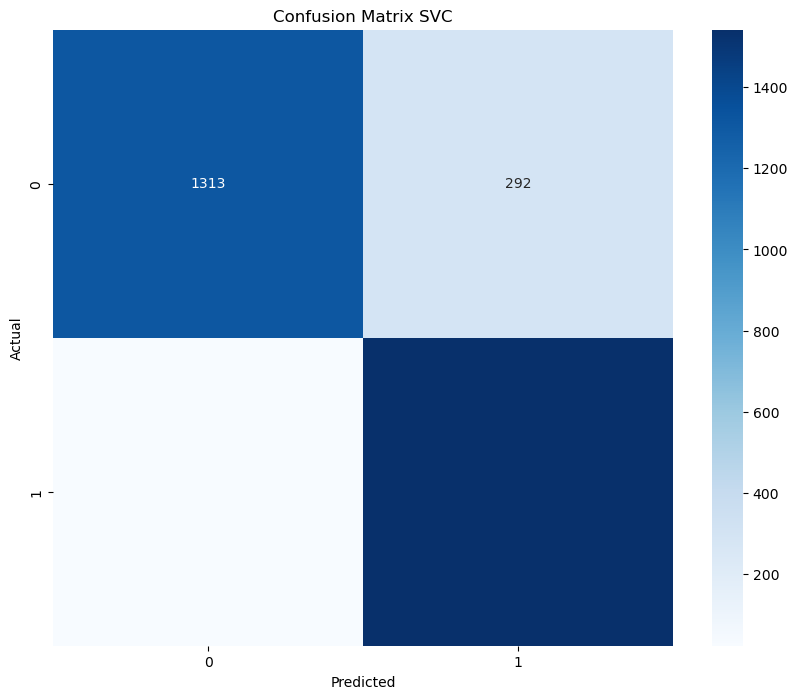

array([[1359,  246],
       [ 191, 1374]], dtype=int64)

In [31]:
# Predict categories for testing dataset SVC
y_pred_svc = grid_clf_svc.predict(X_test)

#Plot the confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC')
plt.show()

cm_svc

In [32]:
print("Classification report SVC : ")
print(classification_report(y_test, y_pred_svc))

Classification report SVC : 
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1605
         1.0       0.85      0.88      0.86      1565

    accuracy                           0.86      3170
   macro avg       0.86      0.86      0.86      3170
weighted avg       0.86      0.86      0.86      3170



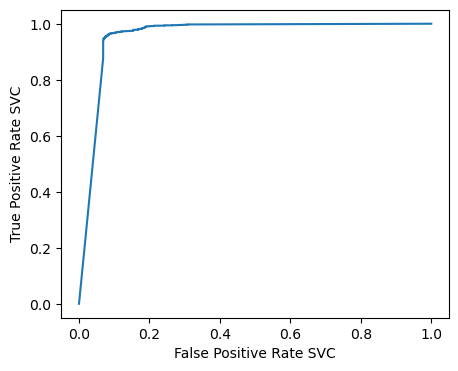

In [33]:
# Compute ROC curve KNN
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, # the true class
    y_pred_proba_knn[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve KNN
plt.figure(figsize = [5, 4])
plt.plot(fpr_svc, tpr_svc, '-')
plt.xlabel('False Positive Rate SVC')
plt.ylabel('True Positive Rate SVC')
plt.show()

In [34]:
param_dict_dt = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': range(1,30,2),
    'dt__min_samples_split': range(1,20),
    'dt__min_samples_leaf' :range(1,10),
    'dt__max_features': ["auto", "sqrt", "log2"],
    'dt__min_impurity_decrease':[0.0,0.1,0.2],
    'select__k': ['all']   # Paramètre pour SelectKBest
}

clf_dt = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('dt', DecisionTreeClassifier())
])

In [35]:
grid_clf_dt = RandomizedSearchCV(
    estimator=clf_dt,
    param_distributions=param_dict_dt,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_dt.fit(X_train, y_train)

Fitting 3 folds for each of 999 candidates, totalling 2997 fits
[CV 1/3; 1/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all
[CV 1/3; 1/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.821 total time=   0.0s
[CV 2/3; 1/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all
[CV 2/3; 1/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.799 total time=   0.0s
[CV 3/3; 1/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=17

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users


[CV 2/3; 4/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all
[CV 2/3; 4/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 4/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all
[CV 3/3; 4/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 5/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=12, select__k=all
[CV 1/3; 5/999] END dt__crite

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/3; 17/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all;, score=0.812 total time=   0.0s
[CV 3/3; 17/999] START dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all
[CV 3/3; 17/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all;, score=0.838 total time=   0.0s
[CV 1/3; 18/999] START dt__criterion=entropy, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=5, select__k=all
[CV 1/3; 18/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=5, select__k=all;, score=0.687 total time=   0.0s
[CV 2/3; 1

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 24/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 24/999] START dt__criterion=log_loss, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=3, select__k=all
[CV 3/3; 24/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 25/999] START dt__criterion=log_loss, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=17, select__k=all
[CV 1/3; 25/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=17, select__k=all;, score=0.735 total time=   0.0

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/3; 37/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 38/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all
[CV 1/3; 38/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 38/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all
[CV 2/3; 38/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 44/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.0s
[CV 3/3; 44/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=1, select__k=all
[CV 3/3; 44/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.0s
[CV 1/3; 45/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all
[CV 1/3; 45/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 45/999

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 50/999] END dt__criterion=entropy, dt__max_depth=23, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 50/999] START dt__criterion=entropy, dt__max_depth=23, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all
[CV 3/3; 50/999] END dt__criterion=entropy, dt__max_depth=23, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 51/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=5, select__k=all
[CV 1/3; 51/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=5, select__k=all;, score=0.336 total time=   0.0s

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 56/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=9, select__k=all;, score=0.692 total time=   0.0s
[CV 3/3; 56/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=9, select__k=all
[CV 3/3; 56/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=9, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 57/999] START dt__criterion=gini, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=3, select__k=all
[CV 1/3; 57/999] END dt__criterion=gini, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 5

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 62/999] END dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all;, score=0.831 total time=   0.0s
[CV 3/3; 62/999] START dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all
[CV 3/3; 62/999] END dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all;, score=0.824 total time=   0.0s
[CV 1/3; 63/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=8, select__k=all
[CV 1/3; 63/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[C

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 69/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 69/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all
[CV 3/3; 69/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 70/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=all
[CV 1/3; 70/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 70

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/3; 76/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 77/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=1, select__k=all
[CV 1/3; 77/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.0s
[CV 2/3; 77/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=1, select__k=all
[CV 2/3; 77/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.0s
[CV 3/3; 77/999] STA

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 92/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.822 total time=   0.0s
[CV 3/3; 92/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 3/3; 92/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.817 total time=   0.0s
[CV 1/3; 93/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all
[CV 1/3; 93/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all;, score=0.814 total time=   0.0s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/3; 97/999] END dt__criterion=gini, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all;, score=0.833 total time=   0.0s
[CV 1/3; 98/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all
[CV 1/3; 98/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 98/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all
[CV 2/3; 98/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 98/999] S

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 103/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 103/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all
[CV 2/3; 103/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all;, score=0.692 total time=   0.0s
[CV 3/3; 103/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all
[CV 3/3; 103/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 114/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 114/999] START dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all
[CV 2/3; 114/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 114/999] START dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all
[CV 3/3; 114/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 115

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 118/999] END dt__criterion=gini, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=16, select__k=all;, score=0.785 total time=   0.0s
[CV 1/3; 119/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all
[CV 1/3; 119/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all;, score=0.833 total time=   0.0s
[CV 2/3; 119/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all
[CV 2/3; 119/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all;, score=0.833 total time=   0.0s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 123/999] END dt__criterion=entropy, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all;, score=0.819 total time=   0.0s
[CV 2/3; 123/999] START dt__criterion=entropy, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all
[CV 2/3; 123/999] END dt__criterion=entropy, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all;, score=0.824 total time=   0.0s
[CV 3/3; 123/999] START dt__criterion=entropy, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all
[CV 3/3; 123/999] END dt__criterion=entropy, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all;, score=0.843 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 129/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 129/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all
[CV 2/3; 129/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 129/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all
[CV 3/3; 129/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 142/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all;, score=0.702 total time=   0.0s
[CV 3/3; 142/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all
[CV 3/3; 142/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 143/999] START dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=13, select__k=all
[CV 1/3; 143/999] END dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=13, select__k=all;, score=0.836 total tim

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 150/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 150/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all
[CV 2/3; 150/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 150/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all
[CV 3/3; 150/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 157/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.0s
[CV 1/3; 158/999] START dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all
[CV 1/3; 158/999] END dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all;, score=0.802 total time=   0.0s
[CV 2/3; 158/999] START dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all
[CV 2/3; 158/999] END dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all;, score=0.832 total time=   

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 163/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=19, select__k=all;, score=0.692 total time=   0.0s
[CV 3/3; 163/999] START dt__criterion=log_loss, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=19, select__k=all
[CV 3/3; 163/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=19, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 164/999] START dt__criterion=log_loss, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=12, select__k=all
[CV 1/3; 164/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=12, select__k=all;, score=0.336 total 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 169/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=16, select__k=all;, score=0.840 total time=   0.0s
[CV 3/3; 169/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=16, select__k=all
[CV 3/3; 169/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=16, select__k=all;, score=0.838 total time=   0.0s
[CV 1/3; 170/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=8, select__k=all
[CV 1/3; 170/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 175/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 175/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=8, select__k=all
[CV 2/3; 175/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 175/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=8, select__k=all
[CV 3/3; 175/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 190/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=13, select__k=all;, score=0.692 total time=   0.0s
[CV 3/3; 190/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=13, select__k=all
[CV 3/3; 190/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=13, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 191/999] START dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=14, select__k=all
[CV 1/3; 191/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 196/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=all;, score=0.724 total time=   0.0s
[CV 2/3; 196/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=all
[CV 2/3; 196/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 196/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=all
[CV 3/3; 196/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 204/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 204/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=all
[CV 3/3; 204/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=all;, score=0.726 total time=   0.0s
[CV 1/3; 205/999] START dt__criterion=log_loss, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=4, select__k=all
[CV 1/3; 205/999] END dt__criterion=log_loss, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=4, select__k=all;, score=0.724 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 218/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 218/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all
[CV 3/3; 218/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 219/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all
[CV 1/3; 219/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all;, score=0.336 total time= 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 224/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 224/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all
[CV 2/3; 224/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all;, score=0.702 total time=   0.0s
[CV 3/3; 224/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all
[CV 3/3; 224/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all;, score=0.726 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 235/999] END dt__criterion=entropy, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=11, select__k=all;, score=0.825 total time=   0.0s
[CV 1/3; 236/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all
[CV 1/3; 236/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 236/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all
[CV 2/3; 236/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   0.0s
[CV 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 238/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=all;, score=0.789 total time=   0.0s
[CV 1/3; 239/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all
[CV 1/3; 239/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 239/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all
[CV 2/3; 239/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all;, score=0.702 total time=   0.0s
[

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 244/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=8, select__k=all;, score=0.819 total time=   0.0s
[CV 1/3; 245/999] START dt__criterion=log_loss, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=14, select__k=all
[CV 1/3; 245/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=14, select__k=all;, score=0.687 total time=   0.0s
[CV 2/3; 245/999] START dt__criterion=log_loss, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=14, select__k=all
[CV 2/3; 245/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=14, select__k=all;, score=0.733 total ti

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 252/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=11, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 253/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=4, select__k=all
[CV 1/3; 253/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=4, select__k=all;, score=0.824 total time=   0.0s
[CV 2/3; 253/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=4, select__k=all
[CV 2/3; 253/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=4, select__k=all;, score=0.827 total time=   0.0s

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 258/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=19, select__k=all;, score=0.823 total time=   0.0s
[CV 2/3; 258/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=19, select__k=all
[CV 2/3; 258/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=19, select__k=all;, score=0.823 total time=   0.0s
[CV 3/3; 258/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=19, select__k=all
[CV 3/3; 258/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=19, select__k=all;, score=0.834 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/3; 262/999] END dt__criterion=log_loss, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.793 total time=   0.0s
[CV 3/3; 262/999] START dt__criterion=log_loss, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all
[CV 3/3; 262/999] END dt__criterion=log_loss, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.818 total time=   0.0s
[CV 1/3; 263/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=3, select__k=all
[CV 1/3; 263/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=3, select__k=all;, score=0.798 total time=   0

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 273/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=5, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 273/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=5, select__k=all
[CV 2/3; 273/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=5, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 273/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=5, select__k=all
[CV 3/3; 273/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=5, select__k=all;, score=0.749 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 278/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 278/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=11, select__k=all
[CV 2/3; 278/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 278/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=11, select__k=all
[CV 3/3; 278/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 282/999] END dt__criterion=gini, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 283/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=4, select__k=all
[CV 1/3; 283/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=4, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 283/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=4, select__k=all
[CV 2/3; 283/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=4, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 283

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 292/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.826 total time=   0.0s
[CV 3/3; 292/999] START dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 3/3; 292/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.821 total time=   0.0s
[CV 1/3; 293/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=16, select__k=all
[CV 1/3; 293/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=16, select__k=all;, score=0.804 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 299/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=5, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 300/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=12, select__k=all
[CV 1/3; 300/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=12, select__k=all;, score=0.814 total time=   0.0s
[CV 2/3; 300/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=12, select__k=all
[CV 2/3; 300/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=12, select__k=all;, score=0.820 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 304/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=all;, score=0.758 total time=   0.0s
[CV 1/3; 305/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=5, select__k=all
[CV 1/3; 305/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=5, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 305/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=5, select__k=all
[CV 2/3; 305/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=5, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 310/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 311/999] START dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=13, select__k=all
[CV 1/3; 311/999] END dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 311/999] START dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=13, select__k=all
[CV 2/3; 311/999] END dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=13, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 315/999] END dt__criterion=gini, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 315/999] START dt__criterion=gini, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all
[CV 3/3; 315/999] END dt__criterion=gini, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 316/999] START dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all
[CV 1/3; 316/999] END dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 321/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 322/999] START dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all
[CV 1/3; 322/999] END dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 322/999] START dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all
[CV 2/3; 322/999] END dt__criterion=log_loss, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all;, score=0.336 total time= 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 328/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=16, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 328/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=16, select__k=all
[CV 3/3; 328/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=16, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 329/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=18, select__k=all
[CV 1/3; 329/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=18, select__k=all;, score=0.735 total time=   0.0s
[CV 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/3; 339/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 339/999] START dt__criterion=entropy, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all
[CV 3/3; 339/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 340/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all
[CV 1/3; 340/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/3; 345/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 345/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=3, select__k=all
[CV 3/3; 345/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 346/999] START dt__criterion=gini, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=1, select__k=all
[CV 1/3; 346/999] END dt__criterion=gini, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.0s
[CV 2

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 355/999] END dt__criterion=gini, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.826 total time=   0.0s
[CV 2/3; 355/999] START dt__criterion=gini, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all
[CV 2/3; 355/999] END dt__criterion=gini, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.844 total time=   0.0s
[CV 3/3; 355/999] START dt__criterion=gini, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all
[CV 3/3; 355/999] END dt__criterion=gini, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.847 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 359/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=2, select__k=all;, score=0.833 total time=   0.0s
[CV 2/3; 359/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=2, select__k=all
[CV 2/3; 359/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=2, select__k=all;, score=0.821 total time=   0.0s
[CV 3/3; 359/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=2, select__k=all
[CV 3/3; 359/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=2, select__k=all;, score=0.845 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 368/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=15, select__k=all;, score=0.837 total time=   0.0s
[CV 1/3; 369/999] START dt__criterion=gini, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all
[CV 1/3; 369/999] END dt__criterion=gini, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 369/999] START dt__criterion=gini, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all
[CV 2/3; 369/999] END dt__criterion=gini, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 369/99

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 374/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all;, score=0.750 total time=   0.0s
[CV 3/3; 374/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all
[CV 3/3; 374/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all;, score=0.765 total time=   0.0s
[CV 1/3; 375/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=18, select__k=all
[CV 1/3; 375/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=18, select__k=all;, score=0.735 total time=   0.0

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 379/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all;, score=0.772 total time=   0.0s
[CV 2/3; 379/999] START dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all
[CV 2/3; 379/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all;, score=0.703 total time=   0.0s
[CV 3/3; 379/999] START dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all
[CV 3/3; 379/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=3, select__k=all;, score=0.764 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 384/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 384/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all
[CV 3/3; 384/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=16, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 385/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=3, select__k=all
[CV 1/3; 385/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=3, select__k=all;, score=0.735 total time

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 394/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 394/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=11, select__k=all
[CV 3/3; 394/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 395/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=5, select__k=all
[CV 1/3; 395/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=5, select__k=all;, score=0.336 total time

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 401/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 401/999] START dt__criterion=log_loss, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all
[CV 3/3; 401/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 402/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=all
[CV 1/3; 402/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=all;, score=0.724 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 407/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all;, score=0.818 total time=   0.0s
[CV 3/3; 407/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all
[CV 3/3; 407/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all;, score=0.821 total time=   0.0s
[CV 1/3; 408/999] START dt__criterion=log_loss, dt__max_depth=19, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=7, select__k=all
[CV 1/3; 408/999] END dt__criterion=log_loss, dt__max_depth=19, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 414/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=6, select__k=all;, score=0.819 total time=   0.0s
[CV 3/3; 414/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=6, select__k=all
[CV 3/3; 414/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=6, select__k=all;, score=0.830 total time=   0.0s
[CV 1/3; 415/999] START dt__criterion=log_loss, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=17, select__k=all
[CV 1/3; 415/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=17, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 420/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 421/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=18, select__k=all
[CV 1/3; 421/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=18, select__k=all;, score=0.848 total time=   0.0s
[CV 2/3; 421/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=18, select__k=all
[CV 2/3; 421/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=18, select__k=all;, score=0.839 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 426/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 426/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all
[CV 3/3; 426/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 427/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=all
[CV 1/3; 427/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 432/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=all;, score=0.818 total time=   0.0s
[CV 2/3; 432/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=all
[CV 2/3; 432/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=all;, score=0.821 total time=   0.0s
[CV 3/3; 432/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=all
[CV 3/3; 432/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=all;, score=0.825 total 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 445/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 445/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all
[CV 2/3; 445/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 445/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all
[CV 3/3; 445/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 455/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 455/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=18, select__k=all
[CV 2/3; 455/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=18, select__k=all;, score=0.702 total time=   0.0s
[CV 3/3; 455/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=18, select__k=all
[CV 3/3; 455/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=18, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 462/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 462/999] START dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all
[CV 2/3; 462/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.692 total time=   0.0s
[CV 3/3; 462/999] START dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all
[CV 3/3; 462/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.749 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 467/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 468/999] START dt__criterion=entropy, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=2, select__k=all
[CV 1/3; 468/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=2, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 468/999] START dt__criterion=entropy, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=2, select__k=all
[CV 2/3; 468/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=2, select__k=all;, score=0.733 total time=   0.0s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/3; 473/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 473/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=13, select__k=all
[CV 3/3; 473/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 474/999] START dt__criterion=gini, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=11, select__k=all
[CV 1/3; 474/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 489/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=14, select__k=all;, score=0.829 total time=   0.0s
[CV 2/3; 489/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=14, select__k=all
[CV 2/3; 489/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=14, select__k=all;, score=0.841 total time=   0.0s
[CV 3/3; 489/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=14, select__k=all
[CV 3/3; 489/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=14, select__k=all;, score=0.821 total 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/3; 494/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=11, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 495/999] START dt__criterion=log_loss, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=15, select__k=all
[CV 1/3; 495/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=15, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 495/999] START dt__criterion=log_loss, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=15, select__k=all
[CV 2/3; 495/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=15, select__k=all;, score=0.336 total t

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 505/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 505/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all
[CV 2/3; 505/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 505/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all
[CV 3/3; 505/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 524/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 524/999] START dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=6, select__k=all
[CV 3/3; 524/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 525/999] START dt__criterion=gini, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=13, select__k=all
[CV 1/3; 525/999] END dt__criterion=gini, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=13, select__k=all;, score=0.813 total time=   0.0s
[CV 2/3; 525

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 533/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=all;, score=0.806 total time=   0.0s
[CV 2/3; 533/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=all
[CV 2/3; 533/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=all;, score=0.840 total time=   0.0s
[CV 3/3; 533/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=all
[CV 3/3; 533/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=all;, score=0.817 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 541/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=11, select__k=all;, score=0.792 total time=   0.0s
[CV 2/3; 541/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=11, select__k=all
[CV 2/3; 541/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=11, select__k=all;, score=0.798 total time=   0.0s
[CV 3/3; 541/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=11, select__k=all
[CV 3/3; 541/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=11, select__k=all;, score=0.813 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 546/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=7, select__k=all;, score=0.687 total time=   0.0s
[CV 2/3; 546/999] START dt__criterion=log_loss, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=7, select__k=all
[CV 2/3; 546/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 546/999] START dt__criterion=log_loss, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=7, select__k=all
[CV 3/3; 546/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=7, select__k=all;, score=0.749 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 562/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.806 total time=   0.0s
[CV 2/3; 562/999] START dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all
[CV 2/3; 562/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.818 total time=   0.0s
[CV 3/3; 562/999] START dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all
[CV 3/3; 562/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.823 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 570/999] END dt__criterion=gini, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 570/999] START dt__criterion=gini, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=19, select__k=all
[CV 3/3; 570/999] END dt__criterion=gini, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 571/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all
[CV 1/3; 571/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all;, score=0.687 total time=   0.0s
[

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 587/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 587/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=all
[CV 2/3; 587/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=all;, score=0.702 total time=   0.0s
[CV 3/3; 587/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=all
[CV 3/3; 587/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 588

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 595/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all;, score=0.819 total time=   0.0s
[CV 2/3; 595/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all
[CV 2/3; 595/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all;, score=0.826 total time=   0.0s
[CV 3/3; 595/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all
[CV 3/3; 595/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=all;, score=0.827 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 603/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=9, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 603/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=9, select__k=all
[CV 2/3; 603/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=9, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 603/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=9, select__k=all
[CV 3/3; 603/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=9, select__k=all;, score=0.749 total time=   0.0s
[C

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 609/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.702 total time=   0.0s
[CV 3/3; 609/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all
[CV 3/3; 609/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 610/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=1, select__k=all
[CV 1/3; 610/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=1, select__k=all;, score=nan total time= 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 617/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 617/999] START dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=6, select__k=all
[CV 3/3; 617/999] END dt__criterion=entropy, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=6, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 618/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=12, select__k=all
[CV 1/3; 618/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=12, select__k=all;, score=0.833 total time=   

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 641/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 641/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=2, select__k=all
[CV 2/3; 641/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 641/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=2, select__k=all
[CV 3/3; 641/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 647/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all;, score=0.843 total time=   0.0s
[CV 3/3; 647/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all
[CV 3/3; 647/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all;, score=0.851 total time=   0.0s
[CV 1/3; 648/999] START dt__criterion=entropy, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=15, select__k=all
[CV 1/3; 648/999] END dt__criterion=entropy, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=15, select__k=all;, score=0.687 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 653/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=11, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 653/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=11, select__k=all
[CV 2/3; 653/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=11, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 653/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=11, select__k=all
[CV 3/3; 653/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=11, select__k=all;, score=0.700 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 659/999] END dt__criterion=gini, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 659/999] START dt__criterion=gini, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=10, select__k=all
[CV 2/3; 659/999] END dt__criterion=gini, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 659/999] START dt__criterion=gini, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=10, select__k=all
[CV 3/3; 659/999] END dt__criterion=gini, dt__max_depth=7, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 660

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 665/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 665/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all
[CV 3/3; 665/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 666/999] START dt__criterion=gini, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=1, select__k=all
[CV 1/3; 666/999] END dt__criterion=gini, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.0s
[CV 2/3; 666/9

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 672/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all;, score=0.816 total time=   0.0s
[CV 2/3; 672/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all
[CV 2/3; 672/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all;, score=0.817 total time=   0.0s
[CV 3/3; 672/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all
[CV 3/3; 672/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=all;, score=0.831 total time=   0.0s
[C

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 679/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=6, select__k=all;, score=0.786 total time=   0.0s
[CV 2/3; 679/999] START dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=6, select__k=all
[CV 2/3; 679/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=6, select__k=all;, score=0.772 total time=   0.0s
[CV 3/3; 679/999] START dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=6, select__k=all
[CV 3/3; 679/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=6, select__k=all;, score=0.797 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 694/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 695/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all
[CV 1/3; 695/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 695/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all
[CV 2/3; 695/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 701/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=9, select__k=all;, score=0.831 total time=   0.0s
[CV 2/3; 701/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=9, select__k=all
[CV 2/3; 701/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=9, select__k=all;, score=0.847 total time=   0.0s
[CV 3/3; 701/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=9, select__k=all
[CV 3/3; 701/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=9, select__k=all;, score=0.841 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 710/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=all;, score=0.799 total time=   0.0s
[CV 2/3; 710/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=all
[CV 2/3; 710/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=all;, score=0.806 total time=   0.0s
[CV 3/3; 710/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=all
[CV 3/3; 710/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=all;, score=0.806 total time=   0.0s
[CV 1/3; 711

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 715/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 715/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all
[CV 2/3; 715/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 715/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all
[CV 3/3; 715/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 726/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 726/999] START dt__criterion=log_loss, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all
[CV 2/3; 726/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 726/999] START dt__criterion=log_loss, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all
[CV 3/3; 726/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=4, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 730/999] END dt__criterion=log_loss, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 731/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=13, select__k=all
[CV 1/3; 731/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=13, select__k=all;, score=0.823 total time=   0.0s
[CV 2/3; 731/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=13, select__k=all
[CV 2/3; 731/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=13, select__k=all;, score=0.830 total 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 735/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=6, select__k=all;, score=0.746 total time=   0.0s
[CV 1/3; 736/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 1/3; 736/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.724 total time=   0.0s
[CV 2/3; 736/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 2/3; 736/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.702 total time=  

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 741/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=2, select__k=all;, score=0.702 total time=   0.0s
[CV 3/3; 741/999] START dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=2, select__k=all
[CV 3/3; 741/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=2, select__k=all;, score=0.700 total time=   0.0s
[CV 1/3; 742/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all
[CV 1/3; 742/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=all;, score=0.336 total time=   0.0s
[

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 746/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=19, select__k=all;, score=0.844 total time=   0.0s
[CV 1/3; 747/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=18, select__k=all
[CV 1/3; 747/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=18, select__k=all;, score=0.824 total time=   0.0s
[CV 2/3; 747/999] START dt__criterion=log_loss, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=18, select__k=all
[CV 2/3; 747/999] END dt__criterion=log_loss, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=18, select__k=all;, score=0.815 total 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 764/999] END dt__criterion=gini, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=2, select__k=all;, score=0.820 total time=   0.0s
[CV 3/3; 764/999] START dt__criterion=gini, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=2, select__k=all
[CV 3/3; 764/999] END dt__criterion=gini, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=2, select__k=all;, score=0.837 total time=   0.0s
[CV 1/3; 765/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=3, select__k=all
[CV 1/3; 765/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=3, select__k=all;, score=0.687 total time=   0.0s
[CV 2/3; 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 770/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 770/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all
[CV 2/3; 770/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 770/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all
[CV 3/3; 770/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=3, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 771

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 775/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all;, score=0.819 total time=   0.0s
[CV 2/3; 775/999] START dt__criterion=gini, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all
[CV 2/3; 775/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all;, score=0.822 total time=   0.0s
[CV 3/3; 775/999] START dt__criterion=gini, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all
[CV 3/3; 775/999] END dt__criterion=gini, dt__max_depth=17, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=all;, score=0.831 total time=   0.0s
[CV 1/3; 776

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 785/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 786/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=9, select__k=all
[CV 1/3; 786/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=9, select__k=all;, score=0.828 total time=   0.0s
[CV 2/3; 786/999] START dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=9, select__k=all
[CV 2/3; 786/999] END dt__criterion=entropy, dt__max_depth=27, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=9, select__k=all;, score=0.815 total time=   0

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/3; 790/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=10, select__k=all;, score=0.845 total time=   0.0s
[CV 1/3; 791/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=7, select__k=all
[CV 1/3; 791/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=7, select__k=all;, score=0.811 total time=   0.0s
[CV 2/3; 791/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=7, select__k=all
[CV 2/3; 791/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=7, select__k=all;, score=0.837 total time=   0.0s

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 798/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=4, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 798/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=4, select__k=all
[CV 2/3; 798/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=4, select__k=all;, score=0.702 total time=   0.0s
[CV 3/3; 798/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=4, select__k=all
[CV 3/3; 798/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=4, select__k=all;, score=0.726 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 810/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 810/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 2/3; 810/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 810/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 3/3; 810/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 811/999]

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 823/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all;, score=0.755 total time=   0.0s
[CV 2/3; 823/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all
[CV 2/3; 823/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 823/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all
[CV 3/3; 823/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all;, score=0.767 total time=   0.0s
[C

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 831/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=2, select__k=all;, score=0.822 total time=   0.0s
[CV 1/3; 832/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=all
[CV 1/3; 832/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 832/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=all
[CV 2/3; 832/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=all;, score=0.702 total time=   0.0s
[CV 3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 843/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all;, score=0.806 total time=   0.0s
[CV 2/3; 843/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all
[CV 2/3; 843/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all;, score=0.819 total time=   0.0s
[CV 3/3; 843/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all
[CV 3/3; 843/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=8, select__k=all;, score=0.841 total time=   0.0s
[CV 1/3; 844

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 849/999] END dt__criterion=gini, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 850/999] START dt__criterion=entropy, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all
[CV 1/3; 850/999] END dt__criterion=entropy, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all;, score=0.819 total time=   0.0s
[CV 2/3; 850/999] START dt__criterion=entropy, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all
[CV 2/3; 850/999] END dt__criterion=entropy, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=6, select__k=all;, score=0.829 total time=   0.0s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/3; 866/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=7, select__k=all;, score=0.843 total time=   0.0s
[CV 1/3; 867/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all
[CV 1/3; 867/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 867/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all
[CV 2/3; 867/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=5, select__k=all;, score=0.336 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 874/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all;, score=0.735 total time=   0.0s
[CV 2/3; 874/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all
[CV 2/3; 874/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all;, score=0.568 total time=   0.0s
[CV 3/3; 874/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all
[CV 3/3; 874/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=all;, score=0.726 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 885/999] END dt__criterion=log_loss, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=2, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 885/999] START dt__criterion=log_loss, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=2, select__k=all
[CV 3/3; 885/999] END dt__criterion=log_loss, dt__max_depth=7, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 886/999] START dt__criterion=log_loss, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=1, select__k=all
[CV 1/3; 886/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=1, select__k=all;, score=nan total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 892/999] END dt__criterion=entropy, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=7, select__k=all;, score=0.792 total time=   0.0s
[CV 3/3; 892/999] START dt__criterion=entropy, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=7, select__k=all
[CV 3/3; 892/999] END dt__criterion=entropy, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=7, select__k=all;, score=0.828 total time=   0.0s
[CV 1/3; 893/999] START dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=19, select__k=all
[CV 1/3; 893/999] END dt__criterion=entropy, dt__max_depth=7, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 900/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 900/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=11, select__k=all
[CV 3/3; 900/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 901/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=15, select__k=all
[CV 1/3; 901/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=5, dt__min_samples_split=15, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 904/999] END dt__criterion=entropy, dt__max_depth=17, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all;, score=0.823 total time=   0.0s
[CV 2/3; 904/999] START dt__criterion=entropy, dt__max_depth=17, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all
[CV 2/3; 904/999] END dt__criterion=entropy, dt__max_depth=17, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all;, score=0.842 total time=   0.0s
[CV 3/3; 904/999] START dt__criterion=entropy, dt__max_depth=17, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all
[CV 3/3; 904/999] END dt__criterion=entropy, dt__max_depth=17, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=9, dt__min_samples_split=2, select__k=all;, score=0.843 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 908/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 908/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=19, select__k=all
[CV 3/3; 908/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=19, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 909/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all
[CV 1/3; 909/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=14, select__k=all;, score=0.336 total time=   

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 921/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 921/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all
[CV 2/3; 921/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all;, score=0.733 total time=   0.0s
[CV 3/3; 921/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all
[CV 3/3; 921/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 922

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 925/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.806 total time=   0.0s
[CV 2/3; 925/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 2/3; 925/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.824 total time=   0.0s
[CV 3/3; 925/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all
[CV 3/3; 925/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=7, select__k=all;, score=0.824 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/3; 930/999] END dt__criterion=log_loss, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=16, select__k=all;, score=0.749 total time=   0.0s
[CV 1/3; 931/999] START dt__criterion=log_loss, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=9, select__k=all
[CV 1/3; 931/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=9, select__k=all;, score=0.808 total time=   0.0s
[CV 2/3; 931/999] START dt__criterion=log_loss, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=9, select__k=all
[CV 2/3; 931/999] END dt__criterion=log_loss, dt__max_depth=21, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=9, select__k=all;, score=0.824 total time

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 936/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 936/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=8, select__k=all
[CV 2/3; 936/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 936/999] START dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=8, select__k=all
[CV 3/3; 936/999] END dt__criterion=gini, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=8, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 937

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 950/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 950/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all
[CV 3/3; 950/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=11, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 951/999] START dt__criterion=gini, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=all
[CV 1/3; 951/999] END dt__criterion=gini, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=all;, score=0.822 total time=   0.0s
[CV 2/3

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 958/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=7, select__k=all;, score=0.828 total time=   0.0s
[CV 2/3; 958/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=7, select__k=all
[CV 2/3; 958/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=7, select__k=all;, score=0.839 total time=   0.0s
[CV 3/3; 958/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=7, select__k=all
[CV 3/3; 958/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=7, select__k=all;, score=0.843 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/3; 965/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all;, score=0.819 total time=   0.0s
[CV 2/3; 965/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all
[CV 2/3; 965/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all;, score=0.831 total time=   0.0s
[CV 3/3; 965/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all
[CV 3/3; 965/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=all;, score=0.821 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 970/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 970/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=13, select__k=all
[CV 3/3; 970/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=13, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 971/999] START dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=17, select__k=all
[CV 1/3; 971/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=17, select__k=all;, score=0.687 total time=   

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 976/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all;, score=0.724 total time=   0.0s
[CV 2/3; 976/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all
[CV 2/3; 976/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 976/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all
[CV 3/3; 976/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=all;, score=0.336 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/3; 982/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 2/3; 982/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all
[CV 2/3; 982/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all;, score=0.336 total time=   0.0s
[CV 3/3; 982/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all
[CV 3/3; 982/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=12, select__k=all;, score=0.726 total time=

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/3; 997/999] END dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=all;, score=0.692 total time=   0.0s
[CV 3/3; 997/999] START dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=all
[CV 3/3; 997/999] END dt__criterion=log_loss, dt__max_depth=13, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=all;, score=0.336 total time=   0.0s
[CV 1/3; 998/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=18, select__k=all
[CV 1/3; 998/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=18, select__k=all;, score=0.735 total time=   0.

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('select',
                                              SelectKBest(score_func=<function f_regression at 0x000002636C3C3100>)),
                                             ('dt', DecisionTreeClassifier())]),
                   n_iter=999,
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': range(1, 30, 2),
                                        'dt__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'dt__min_impurity_decrease': [0.0, 0.1,
                                                                      0.2],
                                        'dt__min_samples_leaf': range(1, 10),
                                        'dt__min_samples_split': range(1, 20),
                                        'select__k': ['all']},
                   scoring='f1_weighted', verbose=10)

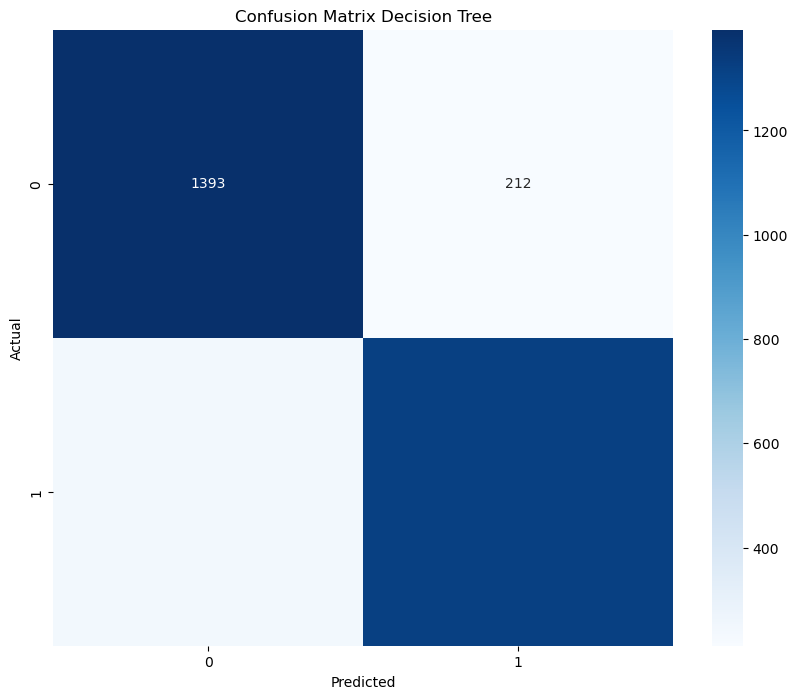

array([[1393,  212],
       [ 242, 1323]], dtype=int64)

In [36]:
# Predict categories for testing dataset DT
y_pred_dt = grid_clf_dt.predict(X_test)
y_pred_proba_dt = grid_clf_dt.predict_proba(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')  # Set annot_kws for font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

cm_dt

In [37]:
print("Classification report Decision Trees : ")
print(classification_report(y_test, y_pred_dt))
print()

Classification report Decision Trees : 
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1605
         1.0       0.86      0.85      0.85      1565

    accuracy                           0.86      3170
   macro avg       0.86      0.86      0.86      3170
weighted avg       0.86      0.86      0.86      3170




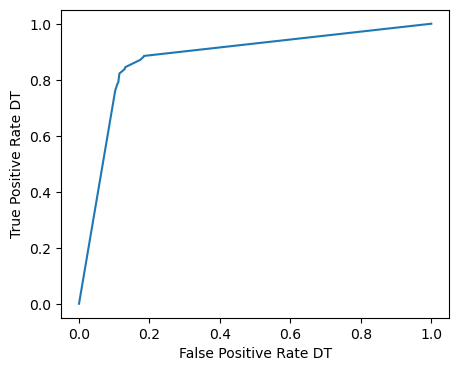

In [38]:
# Compute ROC curve DT
fpr_dt, tpr_dt, thresholds_dt = roc_curve(
    y_test, # the true class
    y_pred_proba_dt[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve DT
plt.figure(figsize = [5, 4])
plt.plot(fpr_dt, tpr_dt, '-')
plt.xlabel('False Positive Rate DT')
plt.ylabel('True Positive Rate DT')
plt.show()

In [39]:
param_dict_rf = {
    'rf__n_estimators': [200,250,300,350],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': range(5, 10),
    'rf__criterion': ['gini', 'entropy'],
    'select__k': ['all'] ,  # Parameter for SelectKBest
}

clf_rf = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('rf', RandomForestClassifier())
])

In [40]:
max_iter = 100
grid_clf_rf = RandomizedSearchCV(
    estimator=clf_rf,
    param_distributions=param_dict_rf,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 1/3; 1/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.867 total time=   3.1s
[CV 2/3; 1/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 2/3; 1/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.873 total time=   2.9s
[CV 3/3; 1/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 3/3; 1/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.882 total time=   2.9s
[CV 1/3; 2/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=a

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 7/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.822 total time=   2.0s
[CV 2/3; 7/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 7/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.824 total time=   1.9s
[CV 3/3; 7/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 7/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.839 total time=   2.2s
[CV 1/3; 8/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 1/3; 8/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.845 total time=   1.7s
[CV 2/3; 8/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 2/3; 8/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.848 total time=   2.0s
[CV 3/3; 8/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 3/3; 8/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.859 total time=   1.9s
[CV 1/3; 9/100] START rf__cri

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 10/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.821 total time=   1.1s
[CV 2/3; 10/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 10/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.826 total time=   1.3s
[CV 3/3; 10/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 10/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.836 total time=   1.4s
[CV 1/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 1/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.844 total time=   2.8s
[CV 2/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 2/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.852 total time=   1.8s
[CV 3/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 3/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.863 total time=   1.8s
[CV 1/3; 12/100] START rf__criterion=gini, 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 12/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.869 total time=   3.7s
[CV 2/3; 12/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 12/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.877 total time=   3.3s
[CV 3/3; 12/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 12/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.884 total time=   3.5s
[CV 1/3; 13/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 1/3; 13/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.866 total time=   1.4s
[CV 2/3; 13/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 2/3; 13/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.876 total time=   1.9s
[CV 3/3; 13/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 3/3; 13/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.886 total time=   1.9s
[CV 1/3; 14/100] START rf__criterion=gini, 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 17/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.856 total time=   3.0s
[CV 2/3; 17/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 17/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.859 total time=   3.2s
[CV 3/3; 17/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 17/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.875 total time=   2.9s
[CV 1/3; 18/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 1/3; 18/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.844 total time=   2.7s
[CV 2/3; 18/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 2/3; 18/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.851 total time=   2.6s
[CV 3/3; 18/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 3/3; 18/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.862 total time=   2.7s
[CV 1/3; 19/100] START

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 21/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.820 total time=   1.5s
[CV 2/3; 21/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 21/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.826 total time=   1.1s
[CV 3/3; 21/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 21/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.838 total time=   1.2s
[CV 1/3; 22/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=all
[CV 1/3; 22/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=all;, score=0.857 total time=   3.0s
[CV 2/3; 22/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=all
[CV 2/3; 22/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=all;, score=0.860 total time=   2.9s
[CV 3/3; 22/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=all
[CV 3/3; 22/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=all;, score=0.871 total time=   3.5s
[CV 1/3; 23/100] START

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 25/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.865 total time=   1.7s
[CV 2/3; 25/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 25/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.872 total time=   1.9s
[CV 3/3; 25/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 25/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.880 total time=   1.8s
[CV 1/3; 26/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=all
[CV 1/3; 26/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=all;, score=0.864 total time=   3.0s
[CV 2/3; 26/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=all
[CV 2/3; 26/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=all;, score=0.878 total time=   3.2s
[CV 3/3; 26/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=all
[CV 3/3; 26/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=all;, score=0.884 total time=   3.1s
[CV 1/3; 27/100] START rf__criterion=gini, 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 29/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.865 total time=   1.7s
[CV 2/3; 29/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 29/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.877 total time=   1.7s
[CV 3/3; 29/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 29/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.881 total time=   1.9s
[CV 1/3; 30/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 1/3; 30/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.854 total time=   2.6s
[CV 2/3; 30/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 2/3; 30/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.865 total time=   2.6s
[CV 3/3; 30/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 3/3; 30/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.873 total time=   2.8s
[CV 1/3; 31/100] START

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 32/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.831 total time=   2.3s
[CV 2/3; 32/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 32/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.836 total time=   2.0s
[CV 3/3; 32/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 32/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.849 total time=   2.1s
[CV 1/3; 33/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 1/3; 33/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.830 total time=   1.5s
[CV 2/3; 33/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 2/3; 33/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.841 total time=   1.4s
[CV 3/3; 33/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 3/3; 33/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.847 total time=   1.5s
[CV 1/3; 34/100] START rf__criterion=gini, 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 35/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.855 total time=   2.3s
[CV 2/3; 35/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 35/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.864 total time=   2.1s
[CV 3/3; 35/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 35/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.878 total time=   2.1s
[CV 1/3; 36/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 36/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.821 total time=   1.5s
[CV 2/3; 36/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 36/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.827 total time=   1.6s
[CV 3/3; 36/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 36/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.841 total time=   2.0s
[CV 1/3; 37/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 1/3; 37/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.831 total time=   2.1s
[CV 2/3; 37/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 2/3; 37/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.841 total time=   2.2s
[CV 3/3; 37/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 3/3; 37/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.845 total time=   2.0s
[CV 1/3; 38/100] START rf

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 38/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.834 total time=   2.0s
[CV 2/3; 38/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 38/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.833 total time=   2.4s
[CV 3/3; 38/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 38/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.849 total time=   2.5s
[CV 1/3; 39/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 39/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.823 total time=   2.0s
[CV 2/3; 39/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 39/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.828 total time=   2.0s
[CV 3/3; 39/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 39/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.840 total time=   1.9s
[CV 1/3; 40/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 1/3; 40/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.843 total time=   1.2s
[CV 2/3; 40/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 2/3; 40/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.853 total time=   1.5s
[CV 3/3; 40/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 3/3; 40/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.865 total time=   1.5s
[CV 1/3; 41/100] START rf__criterion=gini, 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 41/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.853 total time=   2.5s
[CV 2/3; 41/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 41/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.862 total time=   2.6s
[CV 3/3; 41/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 41/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.876 total time=   2.5s
[CV 1/3; 42/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 1/3; 42/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.820 total time=   1.7s
[CV 2/3; 42/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 2/3; 42/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.824 total time=   1.7s
[CV 3/3; 42/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 3/3; 42/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.841 total time=   1.7s
[CV 1/3; 43/100] START rf__criterion=gini, 

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 44/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.833 total time=   1.3s
[CV 2/3; 44/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 44/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.839 total time=   1.4s
[CV 3/3; 44/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 44/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.848 total time=   1.4s
[CV 1/3; 45/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 1/3; 45/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.830 total time=   1.9s
[CV 2/3; 45/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 2/3; 45/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.835 total time=   1.6s
[CV 3/3; 45/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 3/3; 45/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.850 total time=   1.7s
[CV 1/3; 46/100] START rf__criterion=entrop

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 48/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.843 total time=   2.5s
[CV 2/3; 48/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 48/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.849 total time=   2.5s
[CV 3/3; 48/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 48/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.861 total time=   2.4s
[CV 1/3; 49/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 49/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.843 total time=   1.2s
[CV 2/3; 49/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 49/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.848 total time=   1.2s
[CV 3/3; 49/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 49/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.862 total time=   1.4s
[CV 1/3; 50/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 1/3; 50/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.819 total time=   2.1s
[CV 2/3; 50/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 2/3; 50/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.824 total time=   2.1s
[CV 3/3; 50/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 3/3; 50/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.838 total time=   2.2s
[CV 1/3; 51/100] START rf

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 53/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.853 total time=   2.6s
[CV 2/3; 53/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 53/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.862 total time=   2.6s
[CV 3/3; 53/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 53/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.874 total time=   2.7s
[CV 1/3; 54/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 1/3; 54/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.829 total time=   2.4s
[CV 2/3; 54/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 2/3; 54/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.840 total time=   2.2s
[CV 3/3; 54/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 3/3; 54/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.850 total time=   2.3s
[CV 1/3; 55/100] START rf__criterion=ent

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 55/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.827 total time=   2.1s
[CV 2/3; 55/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 55/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.834 total time=   1.9s
[CV 3/3; 55/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 55/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.848 total time=   1.8s
[CV 1/3; 56/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 1/3; 56/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.868 total time=   2.4s
[CV 2/3; 56/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 2/3; 56/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.877 total time=   2.5s
[CV 3/3; 56/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 3/3; 56/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.884 total time=   2.6s
[CV 1/3; 57/100] START rf__criterion=ent

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 59/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.863 total time=   2.8s
[CV 2/3; 59/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 59/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.876 total time=   3.0s
[CV 3/3; 59/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 59/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.883 total time=   3.1s
[CV 1/3; 60/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 60/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.832 total time=   1.3s
[CV 2/3; 60/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 60/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.832 total time=   1.2s
[CV 3/3; 60/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 60/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.846 total time=   1.3s
[CV 1/3; 61/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 1/3; 61/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.834 total time=   1.3s
[CV 2/3; 61/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 2/3; 61/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.838 total time=   1.4s
[CV 3/3; 61/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 3/3; 61/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.851 total time=   1.4s
[CV 1/3; 62/100] START rf__criterion=gin

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 62/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.864 total time=   2.1s
[CV 2/3; 62/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 62/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.874 total time=   2.1s
[CV 3/3; 62/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 62/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.888 total time=   1.9s
[CV 1/3; 63/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 1/3; 63/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.823 total time=   1.5s
[CV 2/3; 63/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 2/3; 63/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.825 total time=   1.8s
[CV 3/3; 63/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 3/3; 63/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.838 total time=   1.6s
[CV 1/3; 64/100] START rf__criterion=entrop

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 64/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.854 total time=   2.3s
[CV 2/3; 64/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 64/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.864 total time=   1.9s
[CV 3/3; 64/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 64/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.874 total time=   2.2s
[CV 1/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 1/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.849 total time=   2.3s
[CV 2/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 2/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.849 total time=   2.4s
[CV 3/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 3/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.862 total time=   2.1s
[CV 1/3; 66/100] START

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 69/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.822 total time=   1.6s
[CV 2/3; 69/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 69/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.828 total time=   1.2s
[CV 3/3; 69/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 69/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.840 total time=   1.1s
[CV 1/3; 70/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 70/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.845 total time=   2.5s
[CV 2/3; 70/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 70/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.852 total time=   2.4s
[CV 3/3; 70/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 70/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.858 total time=   2.4s
[CV 1/3; 71/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 71/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.832 total time=   2.3s
[CV 2/3; 71/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 71/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.833 total time=   2.2s
[CV 3/3; 71/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 71/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.848 total time=   2.2s
[CV 1/3; 72/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 1/3; 72/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.835 total time=   1.5s
[CV 2/3; 72/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 2/3; 72/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.838 total time=   1.6s
[CV 3/3; 72/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all
[CV 3/3; 72/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=all;, score=0.847 total time=   1.4s
[CV 1/3; 73/100] START

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 75/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.834 total time=   1.8s
[CV 2/3; 75/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 75/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.836 total time=   1.6s
[CV 3/3; 75/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 75/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.849 total time=   1.7s
[CV 1/3; 76/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 1/3; 76/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.856 total time=   2.2s
[CV 2/3; 76/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 2/3; 76/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.862 total time=   2.3s
[CV 3/3; 76/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=all
[CV 3/3; 76/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=all;, score=0.876 total time=   2.1s
[CV 1/3; 77/100] START rf__criterion=entrop

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 77/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.841 total time=   1.9s
[CV 2/3; 77/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 77/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.853 total time=   2.0s
[CV 3/3; 77/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 77/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.858 total time=   1.9s
[CV 1/3; 78/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=all
[CV 1/3; 78/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=all;, score=0.822 total time=   1.7s
[CV 2/3; 78/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=all
[CV 2/3; 78/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=all;, score=0.824 total time=   1.6s
[CV 3/3; 78/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=all
[CV 3/3; 78/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=all;, score=0.837 total time=   1.6s
[CV 1/3; 79/100] START

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 81/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.846 total time=   2.4s
[CV 2/3; 81/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 81/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.853 total time=   2.5s
[CV 3/3; 81/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 81/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.861 total time=   2.5s
[CV 1/3; 82/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 82/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.865 total time=   2.4s
[CV 2/3; 82/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 82/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.874 total time=   2.4s
[CV 3/3; 82/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 82/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.884 total time=   2.4s
[CV 1/3; 83/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 83/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.842 total time=   2.3s
[CV 2/3; 83/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 83/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.851 total time=   2.5s
[CV 3/3; 83/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 83/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.862 total time=   2.4s
[CV 1/3; 84/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 1/3; 84/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.855 total time=   1.5s
[CV 2/3; 84/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 2/3; 84/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.863 total time=   1.4s
[CV 3/3; 84/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=all
[CV 3/3; 84/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=all;, score=0.874 total time=   1.5s
[CV 1/3; 85/100] START rf__criterion=entrop

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 86/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.865 total time=   2.5s
[CV 2/3; 86/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 86/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.875 total time=   2.3s
[CV 3/3; 86/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 86/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=all;, score=0.884 total time=   2.5s
[CV 1/3; 87/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 1/3; 87/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.822 total time=   2.2s
[CV 2/3; 87/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 2/3; 87/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.826 total time=   2.1s
[CV 3/3; 87/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all
[CV 3/3; 87/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=all;, score=0.836 total time=   2.1s
[CV 1/3; 88/100] START rf

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 89/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.856 total time=   1.7s
[CV 2/3; 89/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 89/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.868 total time=   1.6s
[CV 3/3; 89/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 89/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.875 total time=   1.7s
[CV 1/3; 90/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=all
[CV 1/3; 90/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=all;, score=0.833 total time=   1.6s
[CV 2/3; 90/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=all
[CV 2/3; 90/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=all;, score=0.840 total time=   1.7s
[CV 3/3; 90/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=all
[CV 3/3; 90/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=all;, score=0.849 total time=   1.6s
[CV 1/3; 91/100] START rf

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 92/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.866 total time=   3.3s
[CV 2/3; 92/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 92/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.874 total time=   3.2s
[CV 3/3; 92/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 92/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.882 total time=   3.7s
[CV 1/3; 93/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 93/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.824 total time=   1.5s
[CV 2/3; 93/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 93/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.824 total time=   1.5s
[CV 3/3; 93/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 93/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=all;, score=0.837 total time=   1.4s
[CV 1/3; 94/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=all
[CV 1/3; 94/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=all;, score=0.842 total time=   1.3s
[CV 2/3; 94/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=all
[CV 2/3; 94/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=all;, score=0.851 total time=   1.5s
[CV 3/3; 94/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=all
[CV 3/3; 94/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=all;, score=0.859 total time=   1.4s
[CV 1/3; 95/100] START

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 98/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.830 total time=   1.1s
[CV 2/3; 98/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 98/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.837 total time=   1.3s
[CV 3/3; 98/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 98/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=all;, score=0.849 total time=   1.2s
[CV 1/3; 99/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 1/3; 99/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.856 total time=   2.2s
[CV 2/3; 99/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 2/3; 99/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.866 total time=   2.1s
[CV 3/3; 99/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all
[CV 3/3; 99/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=all;, score=0.872 total time=   2.3s
[CV 1/3; 100/100] START rf__criterion=entro

C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3; 100/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.822 total time=   1.9s
[CV 2/3; 100/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3; 100/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.828 total time=   2.1s
[CV 3/3; 100/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3; 100/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=350, select__k=all;, score=0.835 total time=   2.2s


C:\Users\thiba\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('select',
                                              SelectKBest(score_func=<function f_regression at 0x000002636C3C3100>)),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=100,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': range(5, 10),
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__n_estimators': [200, 250, 300,
                                                             350],
                                        'select__k': ['all']},
                   scoring='f1_weighted', verbose=10)

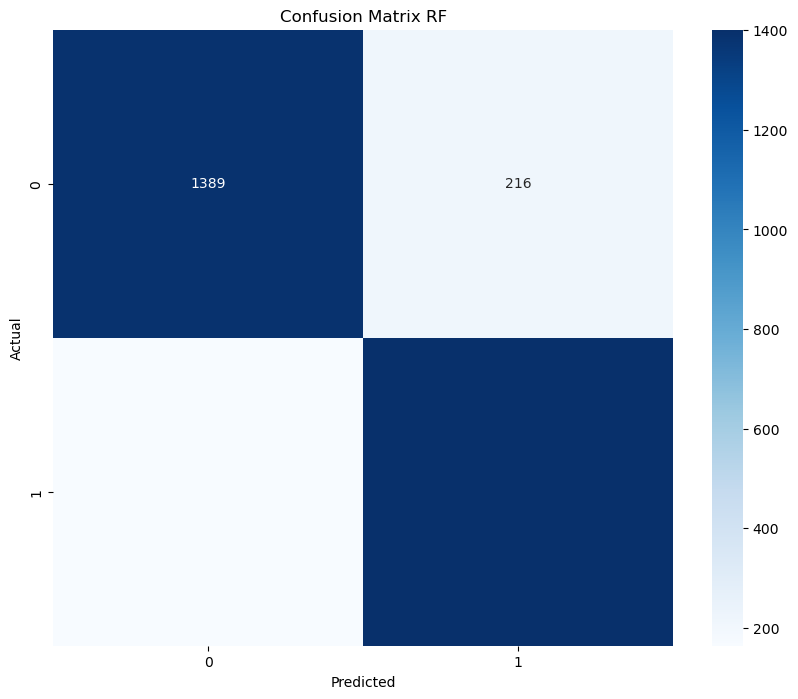

array([[1389,  216],
       [ 164, 1401]], dtype=int64)

In [41]:
# Predict categories for testing dataset RF
y_pred_rf = grid_clf_rf.predict(X_test)
y_pred_proba_rf = grid_clf_rf.predict_proba(X_test)

# Create the confusion matrix for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

cm_rf

In [42]:
print("Classification report Random Forest : ")
print(classification_report(y_test, y_pred_rf))
print()

Classification report Random Forest : 
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1605
         1.0       0.87      0.90      0.88      1565

    accuracy                           0.88      3170
   macro avg       0.88      0.88      0.88      3170
weighted avg       0.88      0.88      0.88      3170




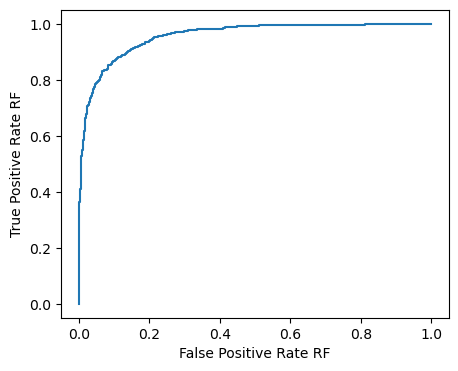

In [43]:
# Compute ROC curve RF
fpr_rf, tpr_rf, thresholds_rf = roc_curve(
    y_test, # the true class
    y_pred_proba_rf[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve RF
plt.figure(figsize = [5, 4])
plt.plot(fpr_rf, tpr_rf, '-')
plt.xlabel('False Positive Rate RF')
plt.ylabel('True Positive Rate RF')
plt.show()